# Plan

* [x] Learn Git stuff
* [x] Create local Git repository at EPOM and repo at GitHub
* [x] Refresh memory about Python
* [x] Learn MATLAB language at enough level to be able convert the code
* [ ] Convert `RegGrid3D.m` to `reg_grid_3d.py`
* [ ] Convert `importfileXYZ.m` to `import_xyz.py`
* [ ] Test
* [ ] Re-Implement stuff
* [ ] Test
* [ ] Test
* [ ] Test

**Other**
* [x] Python paths handling
* [x] Linked list concept (in both Python and Matlab)
* [ ] Something

Python libraries to use:
* os and os.path
* numpy
* Matplotlib.pyplot
* Something else

In [1]:
# Turn off scientific notation
np.set_printoptions(suppress=True)

# Function for searching file paths from given extension

In [2]:
# Define a function that searches for files with defined extension 
# and returns a list of full paths for these files
import os

def find_file_with_extension(extension, path=os.getcwd()):
        # Check the top path existence
    if os.path.exists(path):
        print(('Searching *%s files in directory:' + path + '\n') % extension)
    else:  # Raise a meaningful error
        raise RuntimeError('Path either not exists or not correct ' + path)
    
    
    paths = []
    count = 0
    for dirpath, dirnames, filenames in os.walk(path):
        for filename in filenames:
            fextension = os.path.splitext(filename)[1]
            if fextension == extension:
                paths.append(os.path.abspath(os.path.join(dirpath, filename)))
                print("%d. %s" % (count, filename))
                count += 1
    print("\n")
    return paths

# # Test
# test_paths = find_file_with_extension('.m')
# print(test_paths)

In [3]:
test = find_file_with_extension('.m', path=os.getcwd())

Searching *.m files in directory:/home/jupyter-idudkov/IDudkov_Internship/dynamic_surface_class

0. RegGrid3D.m
1. SlopeOld.m
2. Slope.m
3. Testgrid.m
4. importfileXYZ.m
5. SlopeExample.m




# Functions for XYZ file reading

In [4]:
import os.path
import numpy as np

# Define a function that read XYZ files 
# and returns a numpy array

# Realization 1. Probably well optimized but it crashes EPOM kernel
def read_xyz_file_r1(xyz_filepath, startRow=0, endRow=None, 
                  header_length=0, separator=' '):
            # Check the file existence
    if os.path.exists(xyz_filepath):
        print(('Reading file: %s\n') % xyz_filepath)
    else:   # Raise a meaningful error
        raise RuntimeError('File is not exist or path is not correct')
    if endRow != None:
        xyz_array = np.genfromtxt(xyz_filepath, delimiter=separator, skip_header=header_length,
                                 missing_values=None, max_rows=(endRow-startRow))
    else:
        xyz_array = np.genfromtxt(xyz_filepath, delimiter=separator, skip_header=header_length,
                         missing_values=None, max_rows=endRow)
    return xyz_array
        
    
    # Realization 2. Probably, the best realization. 
    # It takes the least amount of memory and works well, but doesn't have some important features 
    # It doesn't crashing EPOM kernel
def read_xyz_file_r2(xyz_filepath, header_length=0, separator=' '):
            # Check the file existence
    if os.path.exists(xyz_filepath):
        print(('Reading file: %s\n') % xyz_filepath)
    else:   # Raise a meaningful error
        raise RuntimeError('File is not exist or path is not correct')
        
    header = list()
    x_list = list()
    y_list = list()
    z_list = list()
    
    count = 0
    
    with open(xyz_filepath, 'r') as xyz_file:
        for index, line in enumerate(xyz_file):
            if index in range(header_length):
                x, y, z = line.split(separator)
                header.append(x)
                header.append(y)
                header.append(z)
                
                count += 1
            else:
                x, y, z = line.split(separator)

                x_list.append(round(float(x), 3))
                y_list.append(round(float(y), 3))
                z_list.append(round(float(z), 3))
                count += 1
    print("Number of Rows: %d" % count)
    xyz_array = np.array([x_list, y_list, z_list])
    return xyz_array



    # Realization 3. The easiest and the most expensive one
def read_xyz_file_r3(xyz_filepath, startRow=0, endRow=None, 
                  header_length=0, separator=' '):
            # Check the file existence
    if os.path.exists(xyz_filepath):
        print(('Reading file: %s\n') % xyz_filepath)
    else:   # Raise a meaningful error
        raise RuntimeError('File is not exist or path is not correct')        
        # Header reading
        for header_line in xyz_file[startRow: startRow+header_length]:
            header.append(header_line.split(fseparator))
        print(xyz_file)
        # Data reading
        for xyz_line in xyz_file:
            xyz = xyz_line.split(fseparator)
            x.append(round(float(xyz[0]), 3))
            y.append(round(float(xyz[1]), 3))
            z.append(round(float(xyz[2]), 3))
            
    # Open, read and close the file
    xyz_file = open(xyz_filepath, 'r')
    xyz_file_content = xyz_file.read()
    xyz_file.close
    
    xyz_lines = xyz_file_content.splitlines()
    count = 1
    
    header = list()
    x = list()
    y = list()
    z = list()
    
    # Header reading
    for header_line in xyz_lines[startRow: startRow+header_length]:
        header.append(header_line.split(fseparator))
        count += 1
    # Data reading
    for xyz_line in xyz_lines[startRow+header_length: endRow]:
        xyz = xyz_line.split(fseparator)
        x.append(round(float(xyz[0]), 3))
        y.append(round(float(xyz[1]), 3))
        z.append(round(float(xyz[2]), 3))
        count += 1
    print("%d rows were read" % count)
    xyz_array = np.array([x, y, z])
    
    return header, xyz_array

In [5]:
# Test
xyz_paths = find_file_with_extension('.xyz')
xyz_array = read_xyz_file_r2(xyz_paths[1], separator=',',header_length=1)
print(xyz_array)
print(np.shape(xyz_array))

Searching *.xyz files in directory:/home/jupyter-idudkov/IDudkov_Internship/dynamic_surface_class

0. SH2017_MainSurveyLines_1m_CUBE_NOAA.xyz
1. depth.xyz


Reading file: /home/jupyter-idudkov/IDudkov_Internship/dynamic_surface_class/f01_data/depth.xyz

Number of Rows: 10
[[ 367591.5   367612.5   367581.5   367616.5   367598.5   367582.5
   367518.5   367619.5   367615.5 ]
 [4769166.5  4769169.5  4769172.5  4769173.5  4769175.5  4769177.5
  4769179.5  4769180.5  4769181.5 ]
 [    -27.84     -28.25     -27.64     -28.37     -27.95     -27.63
      -26.93     -28.23     -28.19]]
(3, 9)


# Dynamic Surface Class

In [339]:
from collections import deque
import numpy as np
import matplotlib.pyplot as plt

class RegGrid3D:
    """
    Original Matlab Class description:
    % This class hold a UNB style weighed grid - it really consists of two
    % grids, namely a grid of the sum all of the weights of all the
    % contrbutions to the grid cell and a corresponding grid with the sum
    % of all the weighed contributions weighed.
    
    % the big benefit is that you can easily remove and add contributions
    % to the grid
    % Note that the implicit understanding is that the units in the x and y
    % directions are isometric
    
    % Semme Dijkstra    Nov 23, 2016
    
    
    # Convertion to Python started on July 26, 2021
    # Ivan Dudkov
    """
    # Class constructor method
    def __init__(self, res, rInfl, rInc=0, rangeX=None, rangeY=None):
        print("Initialization of the RegGrid3D class\n")
        
        # Properties
        self.res = res # Resolution
        self.rInfl = np.int64(rInfl) # Radius of influence
        if rInc == 0: # ... Radius Increment????
            print("Warning! rInc = 0")
            
        self.rInc = rInc
        self.rPix = round(rInfl/res) # Radius of influence in pixel units
        
        # Check for X,Y range existence
        if rangeX != None and rangeY != None:
            self.rangeX = rangeX
            self.rangeY = rangeY

            # Check for correctness of X,Y ranges
            if len(rangeX) != 2 or len(rangeY) != 2:
                raise RuntimeError("Error! Vectors for Y and X range should contain only 2 elements - min and max extent")

            #### Meshgrid Creation ####
            print("Creating of the meshgrid using range vectors\n")

            # My first implementation. I'm not sure that it is correct, but should be.
            self.X, self.Y = np.meshgrid(np.double(np.linspace(self.rangeX[0], self.rangeX[1], 
                                            np.uint64(np.rint((np.diff(self.rangeX)[0]+self.res)/self.res)))),
                                         np.double(np.linspace(self.rangeY[0], self.rangeY[1],
                                            np.uint64(np.rint((np.diff(self.rangeY)[0]+self.res)/self.res)))))
            
            
            print("""Meshgrid with X and Y dimensions was created: 
            X size is %d, Y size is %d.""" % (np.size(self.X), np.size(self.Y)))

            # Make sure that the stored ranges are an exact representarion
            # of the meshgrid

            if self.X[-1, -1] != self.rangeX[1] and self.Y[-1, -1] != self.rangeY[1]:
                raise RuntimeError("Error! Meshgrid matrices and X,Y range vectors are not equal!")


            # Now create the weighed grid and the associated grid of weights
            self.weighGrid = np.zeros(np.shape(self.X))
            self.sumWeight = self.weighGrid
        else:
            self.rangeX = np.zeros(2)
            self.rangeY = np.zeros(2)
        
        
        # Create a distance weighting kernel that weighs by 1/R**2,
        # except for R=0, for which the weight = 1
        wx, wy = np.meshgrid(np.arange(-self.rPix, self.rPix + 1), 
                             np.arange(-self.rPix, self.rPix + 1)) 
        
        self.kWeight = 1/(wx**2 + wy **2)
        # Deal with the weight at the center i.e., R = 0
        self.kWeight[self.rPix, self.rPix] = 1
        self.kWeight = np.where(self.kWeight < self.rPix**-2, 0, self.kWeight)

    
    def Create(self, x, y, z, obsWeight=1):
        
        # Determine the area of influence in number of pixels,
        # assume isometric coordinates
        
        # Create arrays that cover the full data extent,
        # expanded by the radius of influence in pixel units to
        # ensure that the all data can be fully captured in the arrays
        self.rangeX = np.zeros(2)
        self.rangeY = np.zeros(2)
        
        self.rangeX[0] = np.amin(x) - self.rPix
        self.rangeX[1] = np.amax(x) + self.rPix
        self.rangeY[0] = np.amin(y) - self.rPix
        self.rangeY[1] = np.amax(y) + self.rPix


        # Create a new meshgrid covering the expanded range
        print("Creating of the meshgrid using range vectors\n")
        
        # My first implementation. I'm not sure that it is correct, but should be.
        self.X, self.Y = np.meshgrid(np.double(np.linspace(self.rangeX[0], self.rangeX[1], 
                                        np.uint64(np.rint((np.diff(self.rangeX)[0]+self.res)/self.res)))),
                                     np.double(np.linspace(self.rangeY[0], self.rangeY[1],
                                        np.uint64(np.rint((np.diff(self.rangeY)[0]+self.res)/self.res)))))
        
        # My second implementation. Actually, the same as in Matlab. 
        # I'm not sure as well, but it gives the same result
#         self.X, self.Y = np.meshgrid(np.arange(0, (np.uint64(np.rint(np.diff(self.rangeX)[0]/self.res))) + 1)
#                                                 *self.res + self.rangeX[0],
#                                      np.arange(0, (np.uint64(np.rint(np.diff(self.rangeY)[0]/self.res))) + 1)
#                                                             *self.res + self.rangeY[0])
#         self.rangeX[1] = self.X[-1, -1]
#         self.rangeY[1] = self.Y[-1, -1]
        # Make sure that the stored ranges are an exact representation
        # of the meshgrid
        print("""Meshgrid with X and Y dimensions was created: 
        X size is %d, Y size is %d.""" % (np.size(self.X), np.size(self.Y)))

        # Make sure that the stored ranges are an exact representarion
        # of the meshgrid

        if self.X[-1, -1] != self.rangeX[1] and self.Y[-1, -1] != self.rangeY[1]:
            raise RuntimeError("Error! Meshgrid matrices and X,Y range vectors are not equal!")        
        
        # Now create the weighed grid and the associated grid of weights
        self.weighGrid = np.zeros(np.shape(self.X))
        self.sumWeight = self.weighGrid
        
        # Loop through the data - for now using a for loop
        count = 0
        for i in range(len(z)):
            # Get the location of the data in the grid

            xGrid = np.argwhere(x[i] >= self.X[1, :])[-1][0]
            yGrid = np.argwhere(y[i] >= self.Y[:, 1])[-1][0]

            # Set the location of associated kernel in the grid
            k = np.array([[xGrid - self.rPix, xGrid + (self.rPix+1)], 
                          [yGrid - self.rPix, yGrid + (self.rPix+1)]])
            # Add the contribution to both the weighed grid as well as
            # the grid of summed weights
            self.sumWeight[k[1,0]:k[1,1],k[0,0]:k[0,1]] = self.sumWeight[k[1,0]:k[1,1],k[0,0]:k[0,1]] + \
                                                            obsWeight*self.kWeight
            
            self.weighGrid[k[1,0]:k[1,1],k[0,0]:k[0,1]] = self.weighGrid[k[1,0]:k[1,1],k[0,0]:k[0,1]] + \
                                                            obsWeight*self.kWeight*z[i]

            count += 1
        print("Number of rows read: %d" % (count + 1))
        
        
        
    # Add an array of observations
    def Add(self, x=[], y=[], z=[], obsWeight=1):
        if not np.array([x, y, z]).any():
            return print("Nothing has been added, because x or y or z is an empty array")
        
        # Make sure that arrays cover the full data extent,
        # expanded by the radius of influence in pixel units to
        # ensure that all data can be fully captured in the arrays
        
        if self.rangeX[0] == 0 and self.rangeX[1] == 0:
            # There is no data yet - define the dimension of the grid so
            # that all data can be held
            
            self.rangeX[0] = np.amin(x) - self.rPix
            self.rangeX[1] = np.amax(x) + self.rPix
            self.rangeY[0] = np.amin(y) - self.rPix
            self.rangeY[1] = np.amax(y) + self.rPix
            
            # Create a new meshgrid covering the expanded range
            self.X, self.Y = np.meshgrid(np.double(np.linspace(self.rangeX[0], self.rangeX[1], 
                                            np.uint64(np.rint((np.diff(self.rangeX)[0]+self.res)/self.res)))),
                                         np.double(np.linspace(self.rangeY[0], self.rangeY[1],
                                            np.uint64(np.rint((np.diff(self.rangeY)[0]+self.res)/self.res)))))
            
            print("""Meshgrid with X and Y dimensions was created: 
        X size is %d, Y size is %d.""" % (np.size(self.X), np.size(self.Y)))
            
            # Make sure that the stored ranges are an exact representation of the meshgird
            if self.X[-1, -1] != self.rangeX[1] and self.Y[-1, -1] != self.rangeY[1]:
                raise RuntimeError("Error! Meshgrid matrices and X,Y range vectors are not equal!")   
            
            # Now create the weighed grid and the associated grid of
            # weights. Note that we should test for lack of data by 0s in
            # the weights, not in the weighed depths; zero is a meaningful
            # (and often important) value in grids
            
            self.weighGrid = np.zeros(np.shape(self.X))
            self.sumWeight = self.weighGrid
        else:
            cMinX = 0
            cMaxX = 0
            cMinY = 0
            cMaxY = 0
            # Determine by now how many pixels the grid should be increased
            # in each direction
            
            
            # !!!!! Instead of double I use int values for cMinx, cMinY etc,
            # because python doesn't understand double values for indices
            # indices should be integer!!!! 
            
            if np.amin(x) - self.rPix < self.rangeX[0]:
                if not self.rInc:
                    cMinX = np.int64(np.ceil((self.rangeX[0] - (np.amin(x) - self.rPix))/self.res))
                    
                else:
                    cMinX = self.rInc
                self.rangeX[0] = self.rangeX[0] - cMinX*self.res
            
            if np.amax(x) + self.rPix > self.rangeX[1]:
                if not self.rInc:
                    cMaxX = np.int64(np.ceil((np.amax(x) + self.rPix - self.rangeX[1])/self.res))
                else:
                    cMaxX = self.rInc
                self.rangeX[1] = self.rangeX[2] + np.double(cMaxX)*self.res
                
            if np.amin(y) - self.rPix < self.rangeY[0]:
                if not self.rInc:
                    cMinY = np.int64(np.ceil((self.rangeY[0] - (np.amin(y) - self.rPix))/self.res))
                else:
                    cMinY = self.rInc
                self.rangeY[0] = self.rangeY[0] - cMinY*self.res
            
            if np.amax(y) + self.rPix > self.rangeY[1]:
                if not self.rInc:
                    cMaxY = np.int64(np.ceil((np.amax(y) + self.rPix - self.rangeY[1])/self.res))
                else:
                    cMaxY = self.rInc
                self.rangeY[1] = self.rangeY[1] + cMaxY*self.res
            
            if cMinX or cMinY or cMaxX or cMaxY:
                # Get a copy of existing grid
                wg = self.weighGrid
                sw = self.sumWeight
                
                # Create a new meshgrid covering the expanded range
                self.X, self.Y = np.meshgrid(np.double(np.linspace(self.rangeX[0], self.rangeX[1], 
                                                np.uint64(np.rint((np.diff(self.rangeX)[0]+self.res)/self.res)))),
                                             np.double(np.linspace(self.rangeY[0], self.rangeY[1],
                                                np.uint64(np.rint((np.diff(self.rangeY)[0]+self.res)/self.res)))))
                print("""Meshgrid with X and Y dimensions was created: 
                        X size is %d, Y size is %d.""" % (np.size(self.X), np.size(self.Y)))
                # Make sure that the stored ranges are 
                # an exact representation of the meshgrid
                if self.X[-1, -1] != self.rangeX[1] and self.Y[-1, -1] != self.rangeY[1]:
                    raise RuntimeError("Error! Meshgrid matrices and X,Y range vectors are not equal!") 
                
                
                # Create the new weighed grid and associated sum weights
                self.weighGrid = np.zeros(np.shape(self.X))
                self.sumWeight = self.weighGrid                
                
                # Preserve the previously determined values 
                wg = self.weighGrid[0+cMinY:len(self.weighGrid[0,:])-cMaxY, 
                                    0+cMinX:len(self.weighGrid[0,:])-cMaxX]
                
                sw = self.sumWeight[0+cMinY:len(self.sumWeight[0,:])-cMaxY, 
                                    0+cMinX:len(self.sumWeight[0,:])-cMaxX]
                
                # Loop through the data - for now using a for loop
                count = 0
                for i in range(len(z)):
                    # Get the location of the data in the grid

                    xGrid = np.argwhere(x[i] >= self.X[1, :])[-1][0]
                    yGrid = np.argwhere(y[i] >= self.Y[:, 1])[-1][0]

                    # Set the location of associated kernel in the grid
                    k = np.array([[xGrid - self.rPix, xGrid + (self.rPix+1)], 
                                  [yGrid - self.rPix, yGrid + (self.rPix+1)]])
                    # Add the contribution to both the weighed grid as well as
                    # the grid of summed weights
                    self.sumWeight[k[1,0]:k[1,1],k[0,0]:k[0,1]] = self.sumWeight[k[1,0]:k[1,1],k[0,0]:k[0,1]] + \
                                                                    obsWeight*self.kWeight

                    self.weighGrid[k[1,0]:k[1,1],k[0,0]:k[0,1]] = self.weighGrid[k[1,0]:k[1,1],k[0,0]:k[0,1]] + \
                                                                    obsWeight*self.kWeight*z[i]

                    count += 1
                print("Number of rows read: %d" % (count + 1))
                    
    
    # What does it mean? AofI???
    def AofI(self, x, y, bh, h):
        # x is Easting
        # y is Northing
        # bh is depression angle
        aoi = None
        if not np.array([x, y]).any():
            return print("X or Y array is empty! Method is not initialized")
        
        nS = len(x)
        
        if len(y) != nS:
            raise RuntimeError("Error! Vectors for Y and X range don't have same size!")
        
        # Determine whether the current location is covered by the grid
        
        if not self.rangeX[0]:
            return print("Range X doesn't exists. Method is not initialized")
        else:
            if np.array([np.amin(x) <= self.rangeX[0], 
                         np.amax(x) >= self.rangeX[1],
                         np.amin(y) <= self.rangeY[0],
                         np.amax(y) >= self.rangeY[1]]).any():
                return print("X and Y ranges are not correct. They are less than min/max x and y values.\n \
                Method is not initialized")
        
        # Loop through the data - for now using a for loop
        for i in range(nS):
            
            # Get the location of the data in the grid
            xGrid = np.argwhere(x[i] >= self.X[1, :])[-1][0]
            yGrid = np.argwhere(y[i] >= self.Y[:, 1])[-1][0]            
            
            # xGrid is now your column, yGrid is your row    
            print("xGrid: %d" % xGrid)
            print("yGrid: %d" % yGrid)
                
            # To demonstrate the indexing look at the value from this location
            d_two = self.weighGrid[yGrid, xGrid] / self.sumWeight[yGrid, xGrid]
            
            # Now look at one dimensional indexing of the same grid
            
            ii = np.unravel_index((yGrid + (xGrid-1)*np.shape(self.X)[0]), np.shape(self.X), 'F')
            
            d_one = self.weighGrid[ii] / self.sumWeight[ii]
            
            print("Depth using 2d indexing: %.2f" % d_two)
            print("Depth using 1d indexing: %.2f" % d_one)
            
#                 % So ii is the index of the vertex on the lower left of the
#                 % pixel in which the swath intersects the bottom i.e. the
#                 % pixels is surrounded by the vertices
#                 % LL=(yGrid,xGrid)
#                 % LR=(yGrid,xGrid+1)
#                 % UL=(yGrid+1,xGrid)
#                 % UR=(yGrid+1,xGrid+1?)
                
#                 % Calculate the direction vector and normalize it, also
#                 % offset the heading by 90 degrees            
            h = h + np.pi/2
            u = np.sqrt(np.array([np.cos(h)**2*(1-np.sin(bh[i])**2), 
                                  np.sin(h)**2*(1-np.sin(bh[i])**2),
                                  np.sin(bh[i])]))
                    
                    
#                 % Note you have to careful about the signs
#                 % I did not check this for you
#                 % tan(asin(u(1,3)))*abs(cross distance) should get you
#                 % approximately to the depth observed
                
#                 % etc                    
                    
                    
            

In [340]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt

def surface(x, y, z, x_label='X Label', y_label='Y Label', z_label='Z Label'):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(x, y, z)

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel(z_label)

    plt.show()

In [341]:
xyz_paths = find_file_with_extension('.xyz')
xyz_array = read_xyz_file_r2(xyz_paths[1], separator=',',header_length=1)

Searching *.xyz files in directory:/home/jupyter-idudkov/IDudkov_Internship/dynamic_surface_class

0. SH2017_MainSurveyLines_1m_CUBE_NOAA.xyz
1. depth.xyz


Reading file: /home/jupyter-idudkov/IDudkov_Internship/dynamic_surface_class/f01_data/depth.xyz

Number of Rows: 10


Initialization of the RegGrid3D class

Warning! rInc = 0
Creating of the meshgrid using range vectors

Meshgrid with X and Y dimensions was created: 
        X size is 2743, Y size is 2743.
Number of rows read: 4


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:79: RuntimeWarning: divide by zero encountered in true_divide


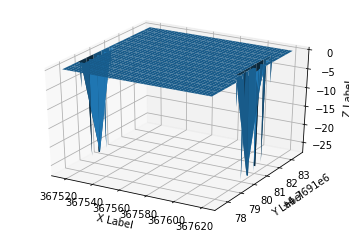

In [342]:
b = RegGrid3D(0.5,1)
b.Create(xyz_array[0,6:], xyz_array[1,6:], xyz_array[2,6:])

surface(b.X, b.Y, b.weighGrid)


Meshgrid with X and Y dimensions was created: 
                        X size is 8229, Y size is 8229.
Number of rows read: 6


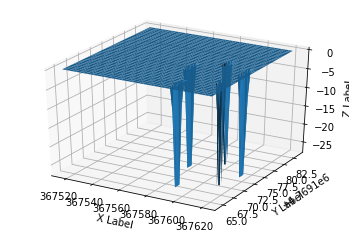

In [343]:
b.Add(xyz_array[0,0:5], xyz_array[1,0:5], xyz_array[2,0:5])
surface(b.X, b.Y, b.weighGrid)

In [344]:
bh = np.deg2rad([10, 20, 30, 40, 50])
h = np.deg2rad(170)
b.AofI(xyz_array[0,0:5], xyz_array[1,0:5], bh, h)

xGrid: 150
yGrid: 4
Depth using 2d indexing: 1.00
Depth using 1d indexing: 1.00
xGrid: 192
yGrid: 10
Depth using 2d indexing: 1.00
Depth using 1d indexing: 1.00
xGrid: 130
yGrid: 16
Depth using 2d indexing: 1.00
Depth using 1d indexing: 1.00
xGrid: 200
yGrid: 18
Depth using 2d indexing: 1.00
Depth using 1d indexing: 1.00
xGrid: 164
yGrid: 22
Depth using 2d indexing: 1.00
Depth using 1d indexing: 1.00


In [323]:
np.shape(b.weighGrid)

(13, 211)

In [324]:
np.shape(b.X)

(13, 211)

In [326]:
np.size(b.X)

2743

In [220]:
g = np.empty(2)
print(g)

[ 367517.5 4769182.5]


In [336]:
mina = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16], [1, 2, 3, 4]])
print(np.unravel_index(, np.shape(mina), 'F'))

(1, 0)


In [281]:
print(np.shape(mina)[0])

5


In [173]:
mina[0:-1, -1]

4

In [255]:
x = [12, 234, 35, 42]

print(x[0:3//2])

[12]


In [ ]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(n.X, n.Y, n.weighGrid)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()